**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

O bien dar click en alguno de los botones siguientes:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=lab/tree/Propedeutico/R/clases/3_estadistica/4_regresion.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter.

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/Rlang) esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


### Lo siguiente está basado en los libros:

### * B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009

### * G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

### El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)


**Nota:**

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con *jupyterlab* y *R*.

In [1]:
library(ggplot2)

In [5]:
options(repr.plot.width=6, repr.plot.height=6) #esta línea sólo se ejecuta para jupyterlab con R

# Introducción

Con frecuencia es necesario determinar si dos variables aleatorias están relacionadas de alguna manera. Por ejemplo ¿tendrán los años de educación efecto sobre el salario que percibe una persona? La relación entre dos variables cuantitativas puede visualizarse en un **diagrama de dispersión** en el plano, representando los valores de las variables en los ejes horizontal y vertical. También el coeficiente de correlación de Pearson ayuda a determinar si exsite alguna relación **lineal** entre las variables de modo que se escribe si están **positivamente, negativamente o no correlacionadas**. Ver [1_elementos_de_estadistica_descriptiva](https://github.com/ITAM-DS/Propedeutico/blob/master/R/clases/3_estadistica/1_elementos_de_estadistica_descriptiva.ipynb)

Un ejemplo de esto es considerar la altura y peso de una persona. Por ejemplo para los datos:

In [6]:
heights <- c(1.94, 1.82, 1.75, 1.80, 1.62, 1.64, 1.68, 1.46, 
             1.50, 1.55, 1.72, 1.67, 1.57, 1.60, 1.70)
weights <- c(98, 80, 72, 83, 65, 70, 67, 47, 45, 50, 70,
             61, 50, 52, 200)

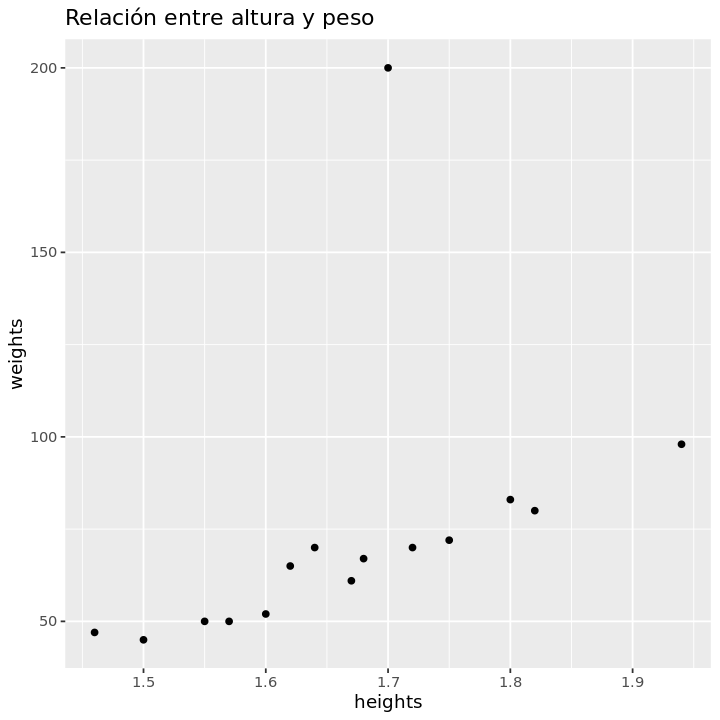

In [7]:
qplot(heights, weights, main = "Relación entre altura y peso")

Se observa una clara relación **lineal** entre el peso y altura de una persona.  La altura y peso tienden a aumentar o disminuir juntos. Escribimos en este caso que ambas variables están **positivamente correlacionadas**. También aquí se tiene un dato atípico o *outlier* el cual debe determinarse si ¿es un error de medición? ¿la persona es atípicamente obesa pues tiene una altura de $1.70$ y $200 kg$?.

También puede darse la situación de que no exista relación alguna entre variables por ejemplo si a los datos de altura anteriores les graficamos con el ingreso de las personas se tiene:

In [8]:
wages <- c(9500, 11000, 16000, 5000, 10000, 10500, 65000, 5000, 5000,
           33000, 25000, 48000, 8000, 5000, 23000)

In [10]:
length(wages)

[1] 15

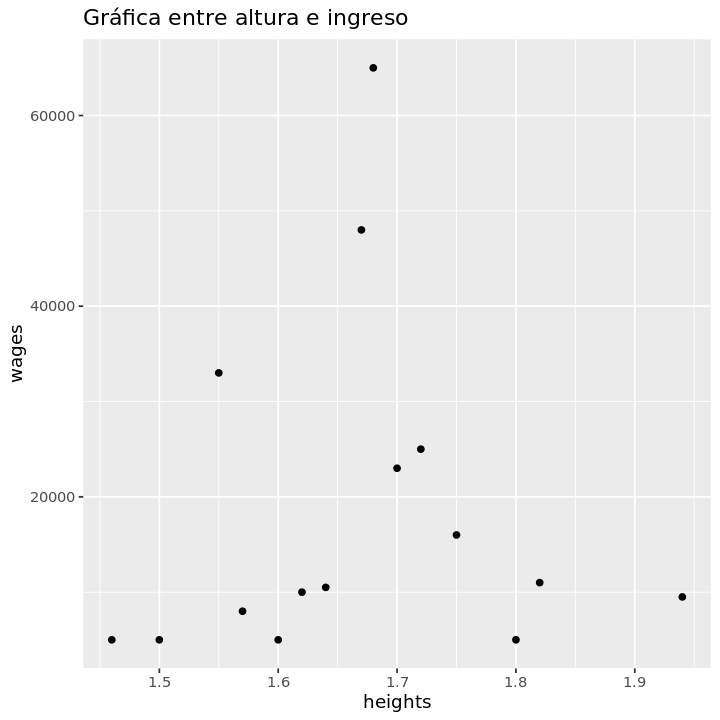

In [12]:
qplot(heights, wages, main = "Gráfica entre altura e ingreso")

En esta gráfica no observamos relación alguna entre ingreso y altura de las personas. 

Y la asociación más simple entre variables es cuando éstas se relacionan en forma lineal, sin embargo, no siempre es posible establecer este tipo de relación entre ellas. Por ejemplo, si tomamos el número promedio de infecciones respiratorias al año que sufre un niño de los 0 a los 12 años con los siguientes datos:

In [13]:
ages <- c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

number_of_respiratory_infections <- c(2, 3, 5, 5, 8, 10, 15,
                                      12, 8, 5, 3, 3, 3)

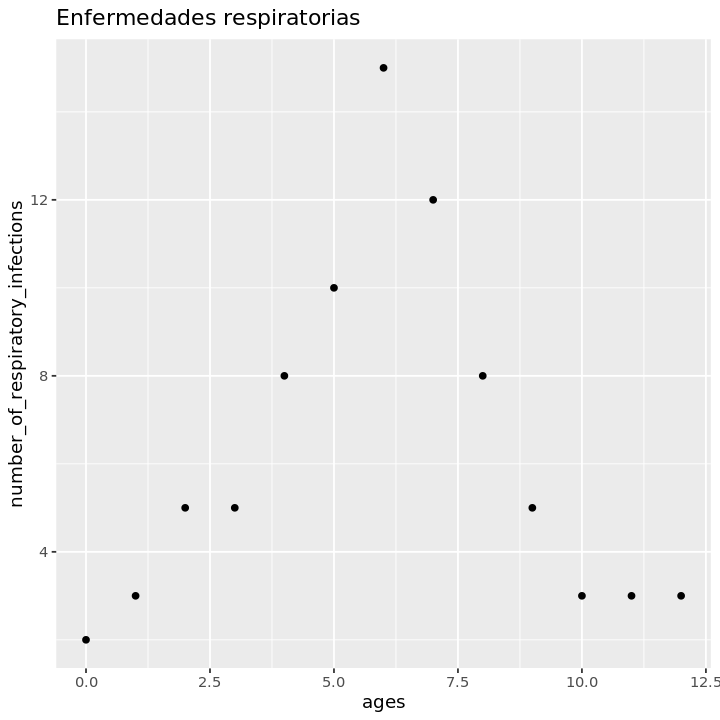

In [14]:
qplot(ages, number_of_respiratory_infections, main="Enfermedades respiratorias")

Observamos en la gráfica anterior que sí existe relación y podría determinarse que una curva con un valor máximo alrededor de los 6 años sería la relación apropiada en este caso y no una recta.

El **análisis de regresión** es la herramienta estadística que estudia las relaciones entre variables.

# Regresión lineal simple